# OLS Simple con Statsmodels

Este notebook implementa un modelo OLS (Ordinary Least Squares) simple usando statsmodels.

## Características:
- Estadísticas detalladas (p-valores, intervalos de confianza)
- Tests de diagnóstico (heterocedasticidad, autocorrelación)
- Métricas de información (AIC, BIC)
- Análisis de influencia y outliers
- Tests de significancia estadística
- Mejor para análisis estadístico formal


In [1]:
# Imports y configuración
import numpy as np
import pandas as pd
from pathlib import Path
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Configuración de la ruta y columnas
CSV_PATH = Path(r'C:\Users\INMORTAL\OneDrive\Documentos\python\notebooks\modelos\Data\Global_Cybersecurity_Threats_2015-2024.csv')
COL_X_SIMPLE = 'Number of Affected Users'    # variable explicativa
COL_Y = 'Financial Loss (in Million $)'      # variable objetivo

# Carga de datos
if not CSV_PATH.exists():
    raise FileNotFoundError(f'No existe el CSV en: {CSV_PATH.resolve()}')

df = pd.read_csv(CSV_PATH)
print('Shape:', df.shape)
print('Columnas:', list(df.columns))
df.head()


Shape: (3000, 10)
Columnas: ['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [2]:
# OLS Simple con Statsmodels
print("=== OLS SIMPLE CON STATSMODELS ===")

# Preparar datos para OLS simple
if COL_X_SIMPLE not in df.columns or COL_Y not in df.columns:
    raise ValueError('Revisa COL_X_SIMPLE y COL_Y. No existen en el DataFrame.')

X_simple = df[[COL_X_SIMPLE]].dropna()
y_simple = df.loc[X_simple.index, COL_Y]

# Agregar constante (intercepto)
X_simple_ols = sm.add_constant(X_simple)
y_simple_ols = y_simple

# Crear y ajustar modelo OLS
model_ols_simple = sm.OLS(y_simple_ols, X_simple_ols).fit()

# Mostrar resumen completo
print(model_ols_simple.summary())


=== OLS SIMPLE CON STATSMODELS ===
                                  OLS Regression Results                                 
Dep. Variable:     Financial Loss (in Million $)   R-squared:                       0.000
Model:                                       OLS   Adj. R-squared:                 -0.000
Method:                            Least Squares   F-statistic:                  0.009571
Date:                           Fri, 17 Oct 2025   Prob (F-statistic):              0.922
Time:                                   11:44:46   Log-Likelihood:                -14337.
No. Observations:                           3000   AIC:                         2.868e+04
Df Residuals:                               2998   BIC:                         2.869e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                               coef    std err          t      P>

In [3]:
# Diagnósticos adicionales
print("\n=== DIAGNÓSTICOS OLS SIMPLE ===")
print(f"R² ajustado: {model_ols_simple.rsquared_adj:.4f}")
print(f"AIC: {model_ols_simple.aic:.2f}")
print(f"BIC: {model_ols_simple.bic:.2f}")
print(f"Log-Likelihood: {model_ols_simple.llf:.2f}")

# Test de heterocedasticidad (Breusch-Pagan)
bp_stat, bp_pvalue, _, _ = het_breuschpagan(model_ols_simple.resid, X_simple_ols)
print(f"Test Breusch-Pagan (heterocedasticidad): estadístico={bp_stat:.4f}, p-valor={bp_pvalue:.4f}")

# Test de Durbin-Watson (autocorrelación)
dw_stat = durbin_watson(model_ols_simple.resid)
print(f"Test Durbin-Watson (autocorrelación): {dw_stat:.4f}")

# Interpretación de tests
print(f"\n=== INTERPRETACIÓN DE TESTS ===")
if bp_pvalue < 0.05:
    print("⚠️  Heterocedasticidad detectada (p < 0.05)")
else:
    print("✅ No hay evidencia de heterocedasticidad (p >= 0.05)")

if dw_stat < 1.5:
    print("⚠️  Posible autocorrelación positiva (DW < 1.5)")
elif dw_stat > 2.5:
    print("⚠️  Posible autocorrelación negativa (DW > 2.5)")
else:
    print("✅ No hay evidencia de autocorrelación (1.5 <= DW <= 2.5)")



=== DIAGNÓSTICOS OLS SIMPLE ===
R² ajustado: -0.0003
AIC: 28677.09
BIC: 28689.10
Log-Likelihood: -14336.54
Test Breusch-Pagan (heterocedasticidad): estadístico=1.4461, p-valor=0.2292
Test Durbin-Watson (autocorrelación): 2.0331

=== INTERPRETACIÓN DE TESTS ===
✅ No hay evidencia de heterocedasticidad (p >= 0.05)
✅ No hay evidencia de autocorrelación (1.5 <= DW <= 2.5)


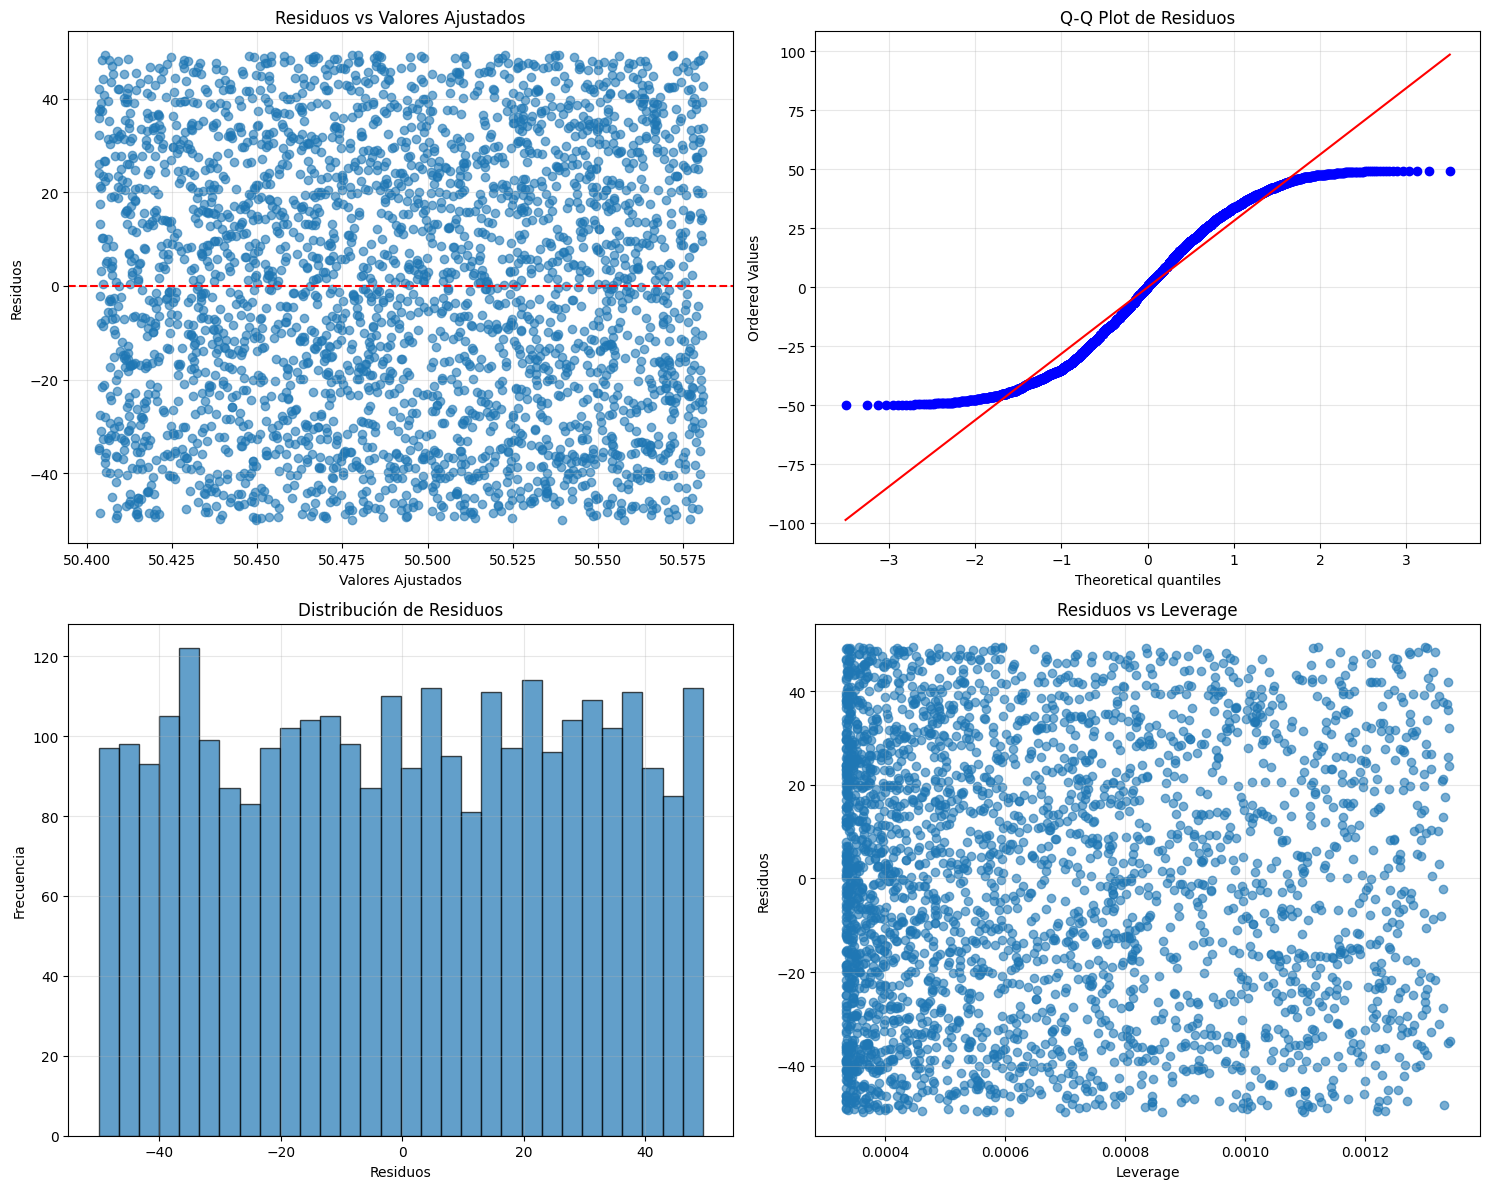

In [4]:
# Gráficos de diagnóstico
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Residuals vs Fitted
axes[0,0].scatter(model_ols_simple.fittedvalues, model_ols_simple.resid, alpha=0.6)
axes[0,0].axhline(y=0, color='r', linestyle='--')
axes[0,0].set_xlabel('Valores Ajustados')
axes[0,0].set_ylabel('Residuos')
axes[0,0].set_title('Residuos vs Valores Ajustados')
axes[0,0].grid(True, alpha=0.3)

# 2. Q-Q plot
stats.probplot(model_ols_simple.resid, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot de Residuos')
axes[0,1].grid(True, alpha=0.3)

# 3. Histograma de residuos
axes[1,0].hist(model_ols_simple.resid, bins=30, alpha=0.7, edgecolor='black')
axes[1,0].set_xlabel('Residuos')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución de Residuos')
axes[1,0].grid(True, alpha=0.3)

# 4. Residuals vs Leverage
influence = OLSInfluence(model_ols_simple)
axes[1,1].scatter(influence.hat_matrix_diag, model_ols_simple.resid, alpha=0.6)
axes[1,1].set_xlabel('Leverage')
axes[1,1].set_ylabel('Residuos')
axes[1,1].set_title('Residuos vs Leverage')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== ANÁLISIS DE OUTLIERS E INFLUENCIA ===
Observaciones con alta influencia (leverage): 9
Outliers en residuos (|resid| > 3σ): 0

Índices de observaciones problemáticas: [ 134  178  503  577 1185 1503 1637 2217 2502]...

Observaciones problemáticas:
      Number of Affected Users  Financial Loss (in Million $)
134                        424                          15.76
178                       2233                          67.90
503                       1174                          86.38
577                       1068                          15.34
1185                       984                          76.39
1503                       586                          82.66
1637                       735                          74.50
2217                      1579                          87.71
2502                      1326                          92.48


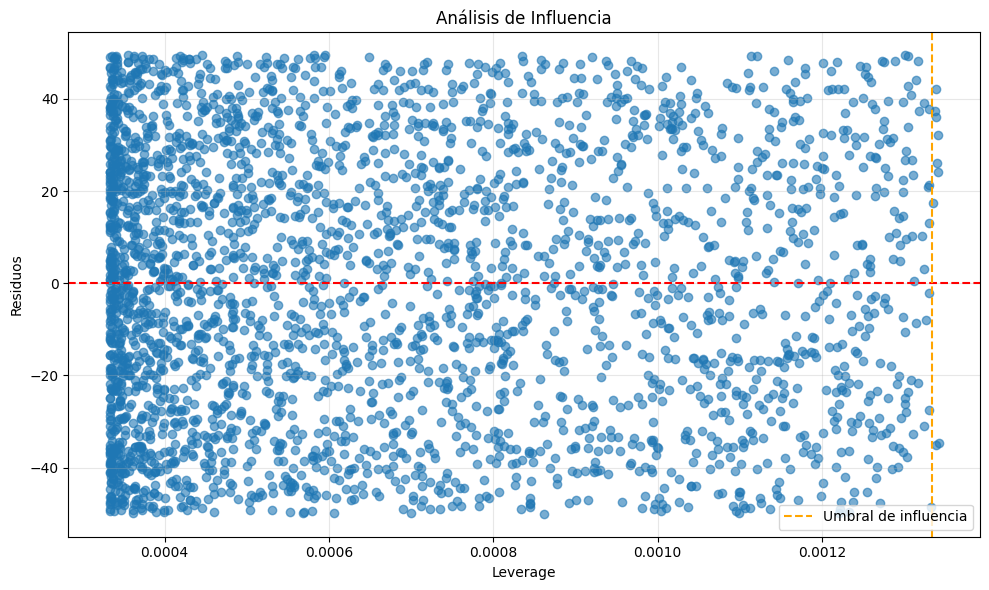

In [5]:
# Análisis de outliers e influencia
print("=== ANÁLISIS DE OUTLIERS E INFLUENCIA ===")

# Identificar observaciones con alta influencia
leverage = influence.hat_matrix_diag
high_leverage = leverage > 2 * leverage.mean()
print(f"Observaciones con alta influencia (leverage): {high_leverage.sum()}")

# Identificar outliers en residuos
resid_std = np.abs(model_ols_simple.resid) / model_ols_simple.resid.std()
outliers = resid_std > 3
print(f"Outliers en residuos (|resid| > 3σ): {outliers.sum()}")

# Mostrar observaciones problemáticas
if high_leverage.any() or outliers.any():
    problem_indices = np.where(high_leverage | outliers)[0]
    print(f"\nÍndices de observaciones problemáticas: {problem_indices[:10]}...")  # Mostrar solo los primeros 10
    
    # Crear DataFrame con observaciones problemáticas
    problem_df = df.iloc[problem_indices[:10]][[COL_X_SIMPLE, COL_Y]]
    print("\nObservaciones problemáticas:")
    print(problem_df)

# Gráfico de influencia
plt.figure(figsize=(10, 6))
plt.scatter(leverage, model_ols_simple.resid, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=2*leverage.mean(), color='orange', linestyle='--', label='Umbral de influencia')
plt.xlabel('Leverage')
plt.ylabel('Residuos')
plt.title('Análisis de Influencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
